In [ ]:
!nvidia-smi

Mon May  1 21:14:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XZfbis80Ethf0eqqIYuz")
project = rf.workspace("ahmad-hamdan").project("cv_bonus")
dataset = project.version(1).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=88d6f878e2c131403c0948eef44447e1d6f408df2a7fd7f1102007bb75d4def4
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstal

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to CV_bonus-1 in yolov8:: 100%|██████████| 432/432 [00:00<00:00, 2069.77it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=30 imgsz=640 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.yaml, data=/content/datasets/CV_bonus-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic

In [ ]:
!ls {HOME}/runs/segment/train2

args.yaml					    results.csv
BoxF1_curve.png					    results.png
BoxP_curve.png					    train_batch0.jpg
BoxPR_curve.png					    train_batch1.jpg
BoxR_curve.png					    train_batch240.jpg
confusion_matrix.png				    train_batch241.jpg
events.out.tfevents.1682975787.6ed998c54e32.1780.0  train_batch242.jpg
MaskF1_curve.png				    train_batch2.jpg
MaskP_curve.png					    val_batch0_labels.jpg
MaskPR_curve.png				    val_batch0_pred.jpg
MaskR_curve.png					    weights


/content


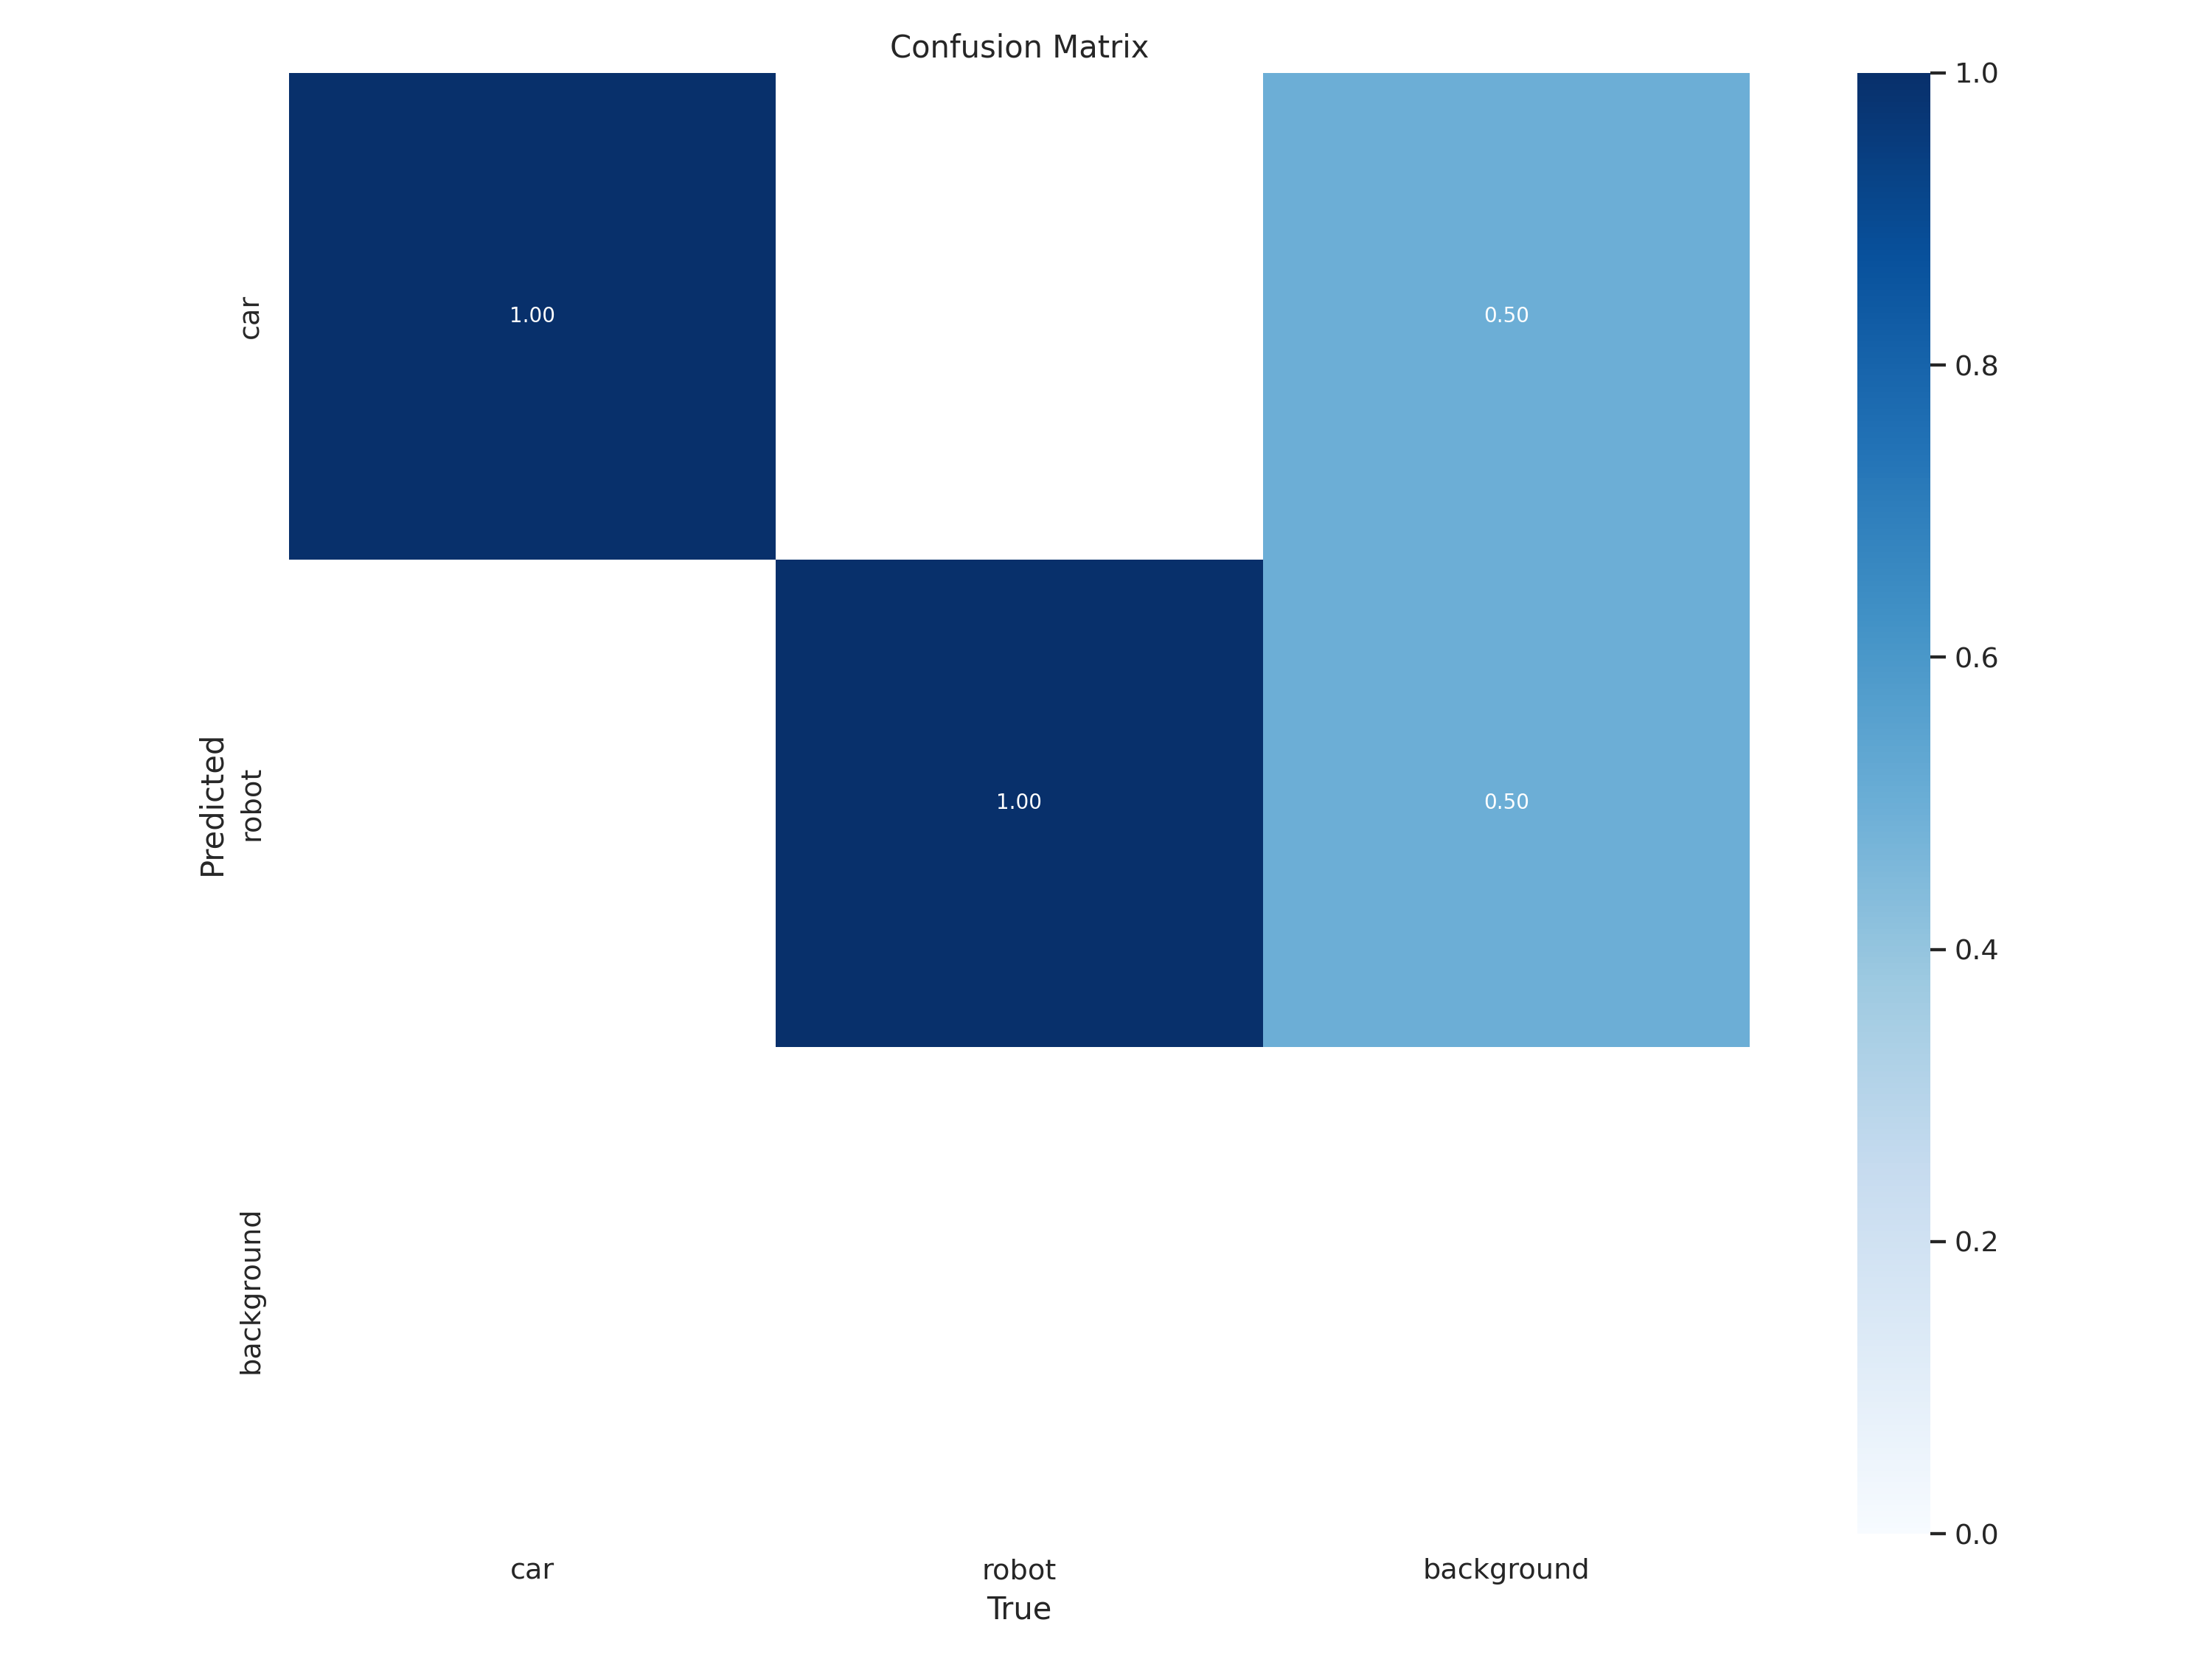

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=640)

/content


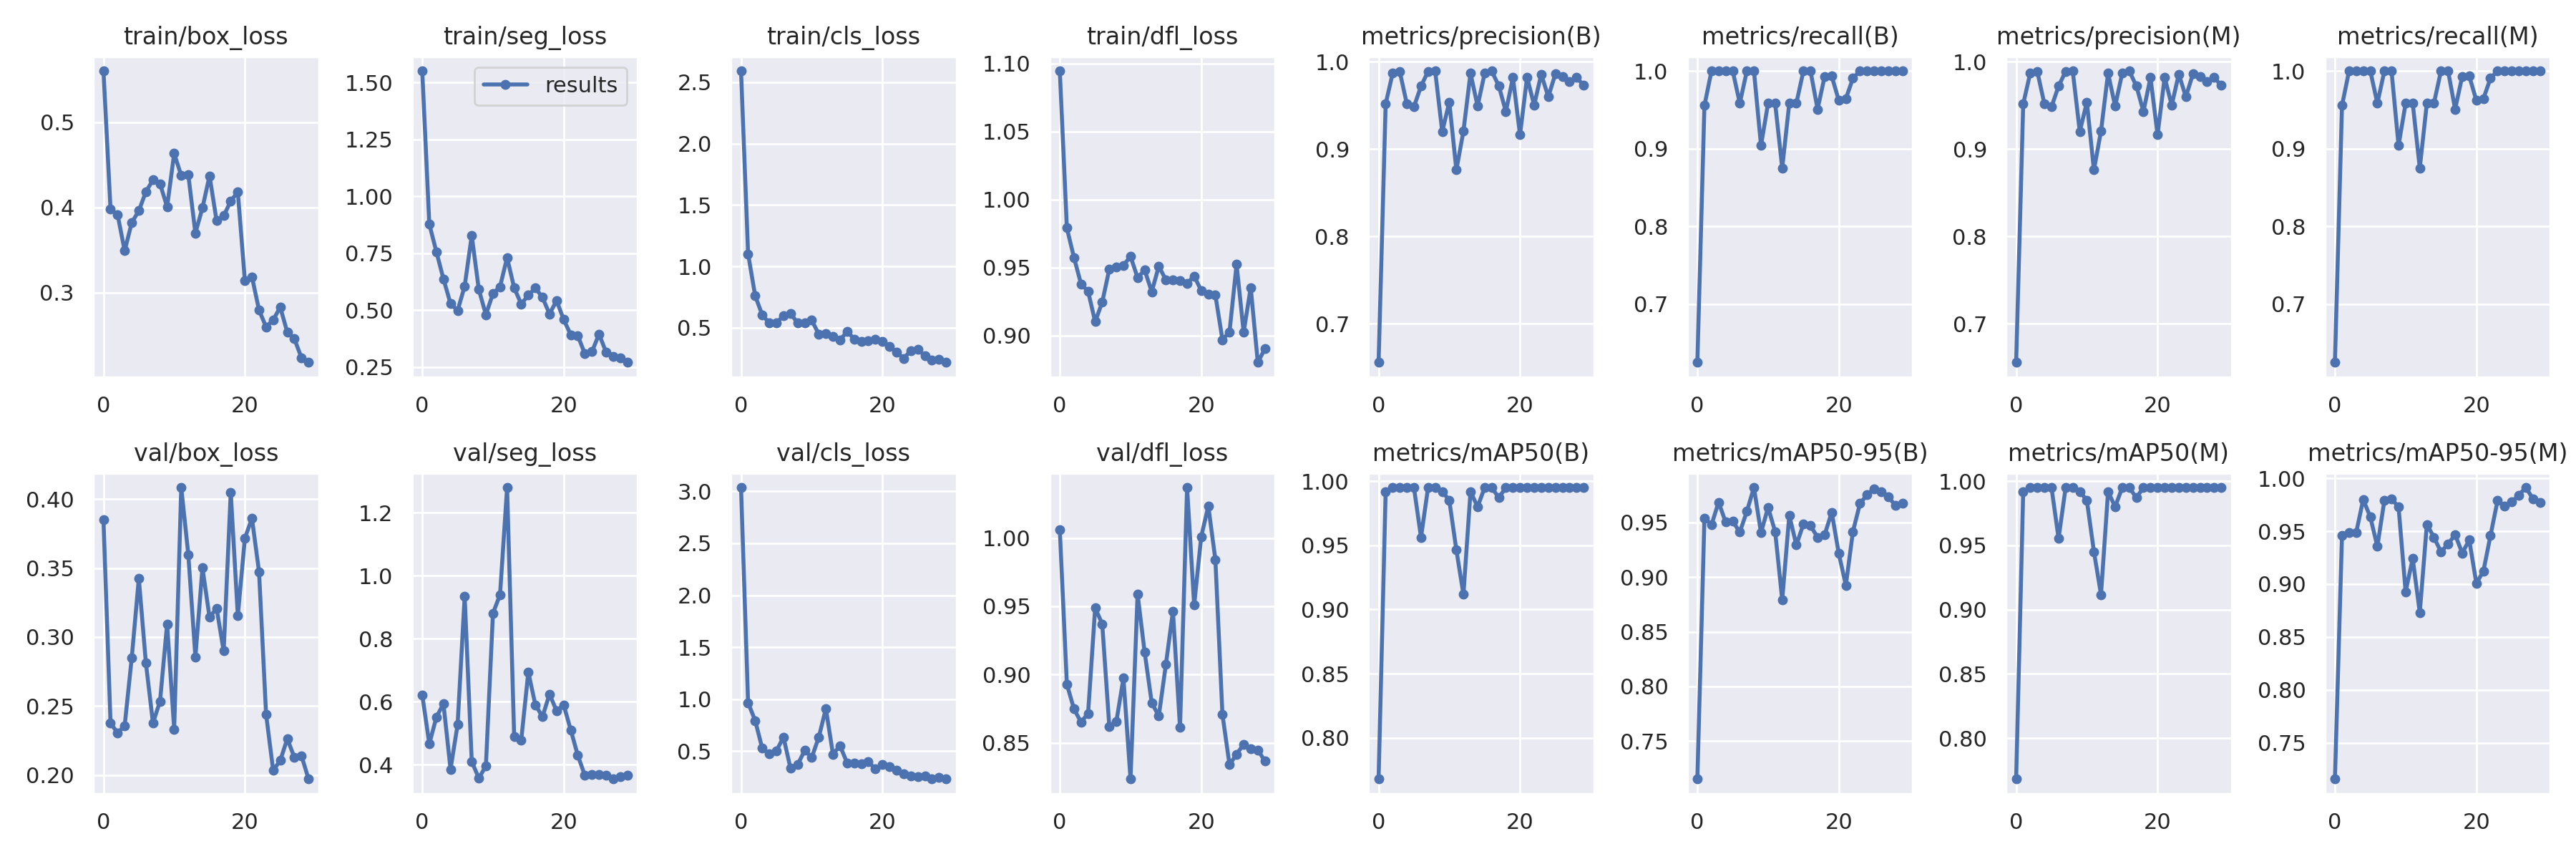

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=640)

/content


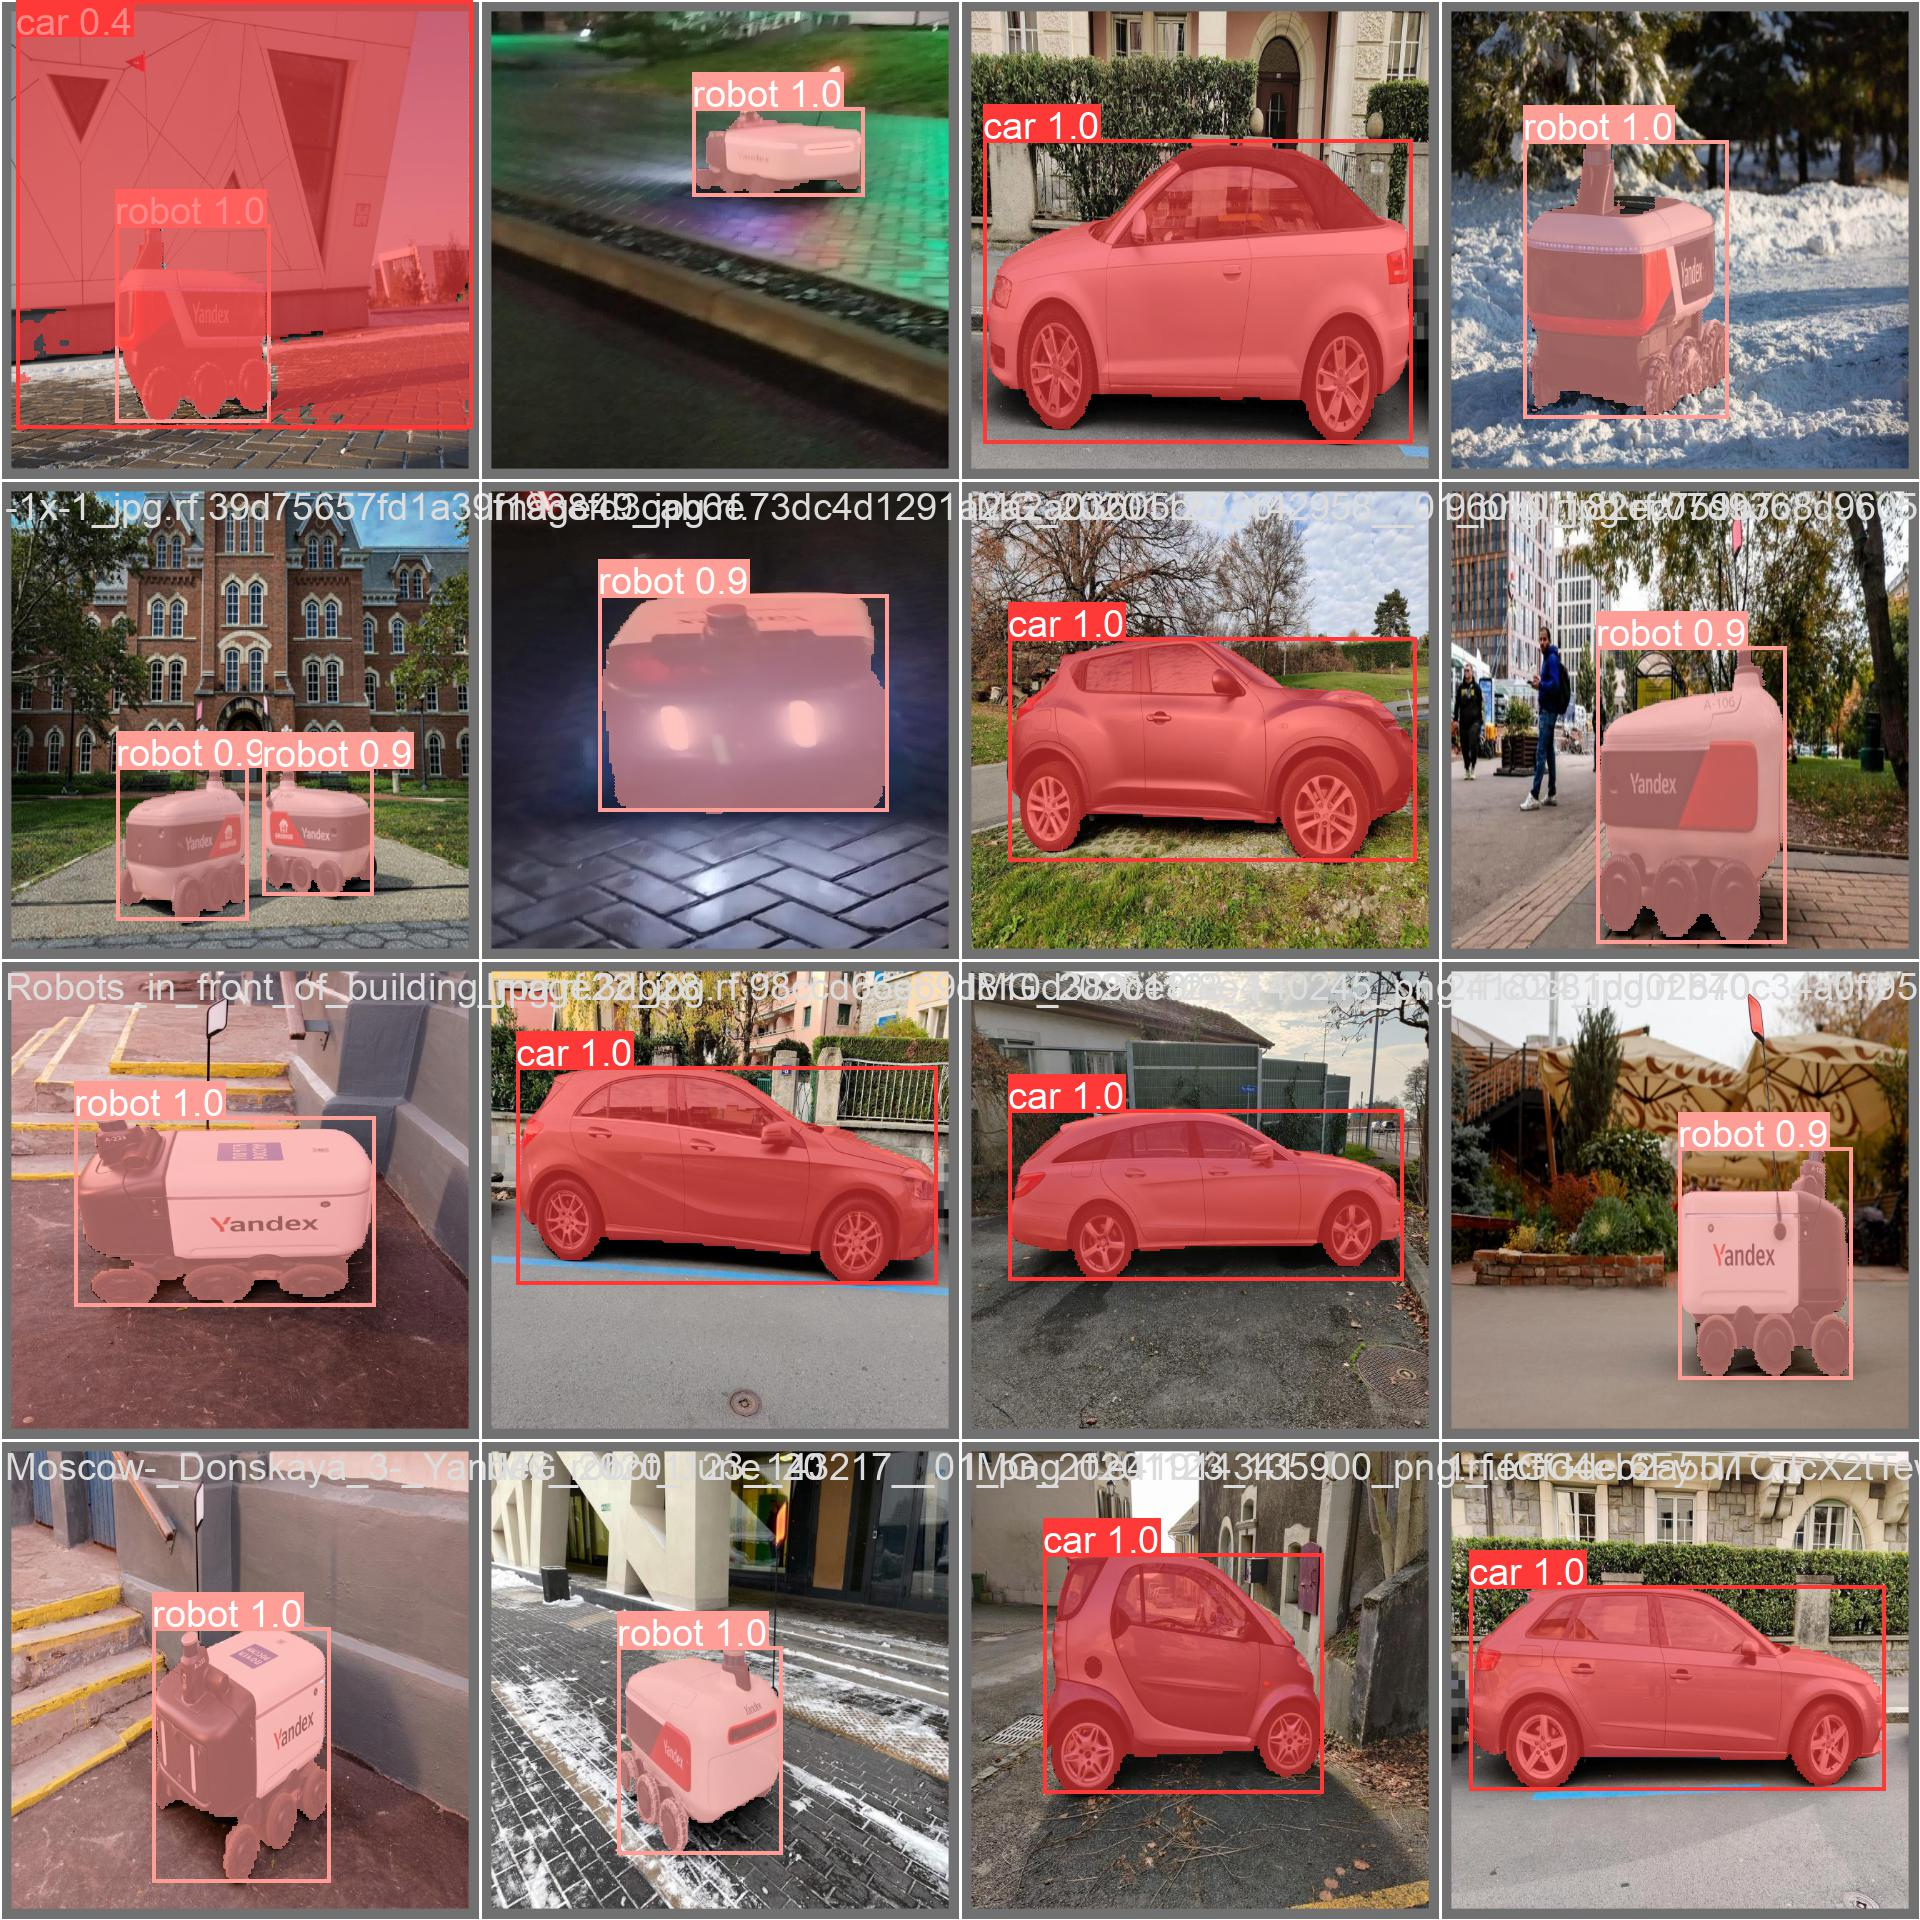

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/val_batch0_pred.jpg', width=640)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-01 21:25:21.564829: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 21:25:22.561699: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/CV_bonus-1/valid/labels.cache... 17 images, 0 backgrounds, 0 corrupt: 100% 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.32it/s]
                   all         17         18      0.977          1      0.

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train2/weights/best.pt conf=0.75 source={dataset.location}/test/images save=True

/content
2023-05-01 21:25:50.670230: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 21:25:51.647400: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs
image 1/11 /content/datasets/CV_bonus-1/test/images/211121_GrubHub_Robots016_web_jpg.rf.af8887a8c40903ded9f434be01e52184.jpg: 640x640 1 robot, 45.6ms
image 2/11 /content/datasets/CV_bonus-1/test/images/IMG_20201123_135102_png.rf.555740985f0ee9e89b7942ba74f7cfaa.jpg: 640x640 1 car, 46.5ms
image 3/11 /content/datasets/CV_bonus-1/test/images/IMG_20201123_135137_png.rf.b035

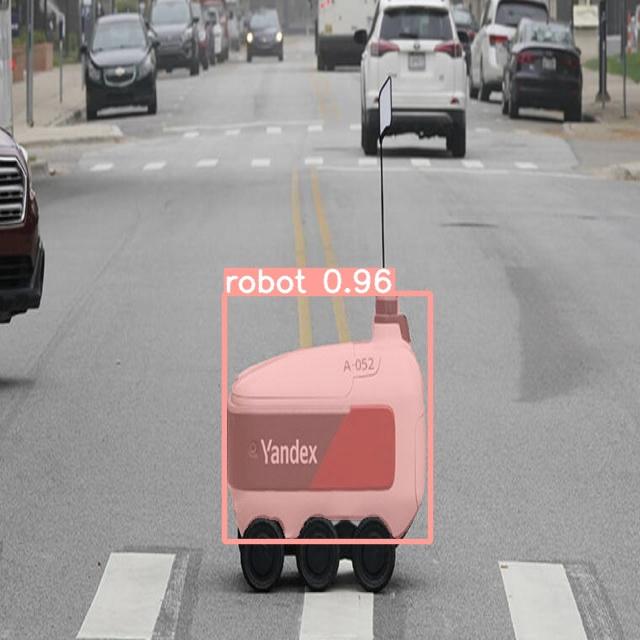

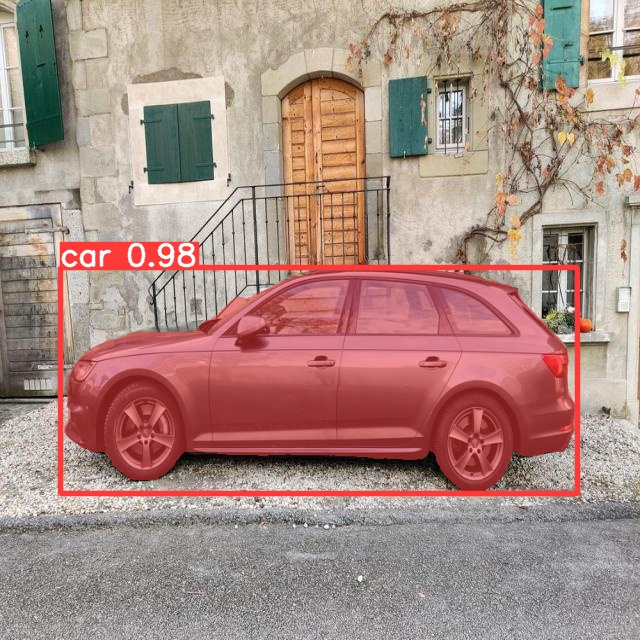

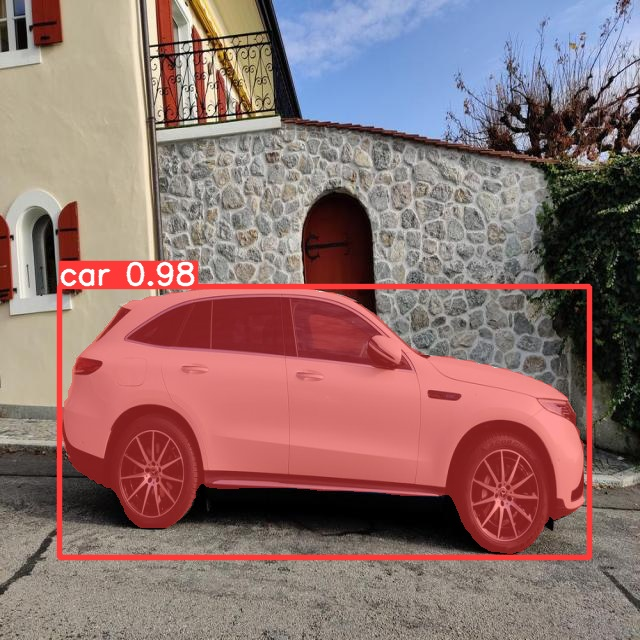

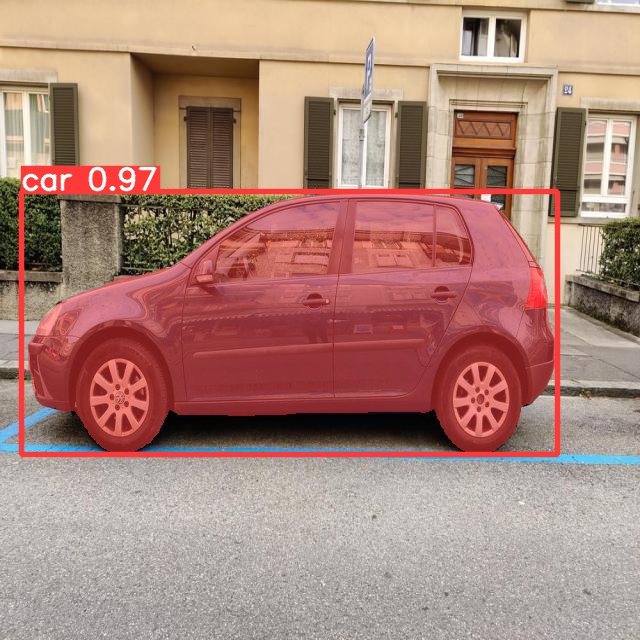

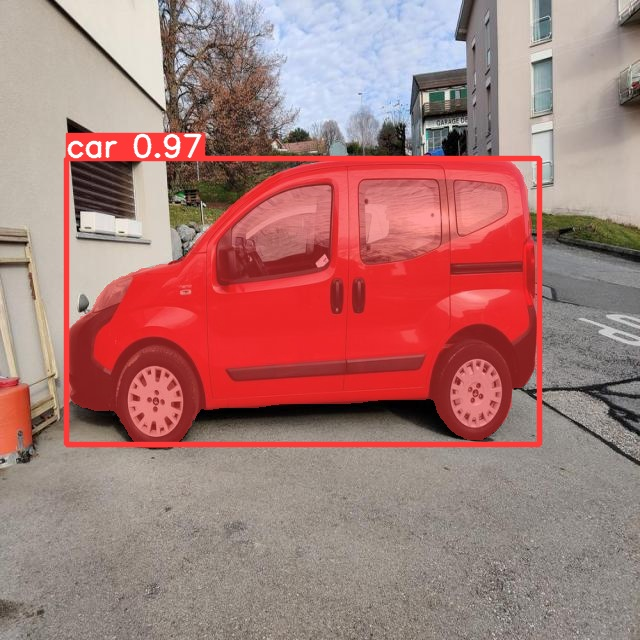

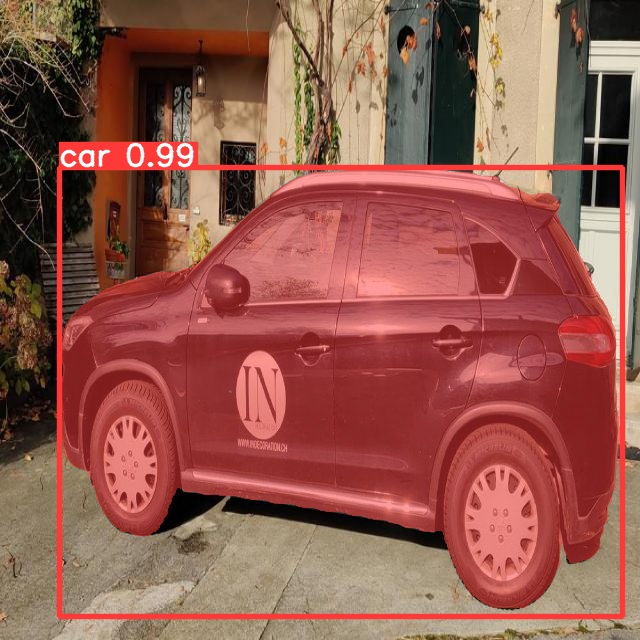

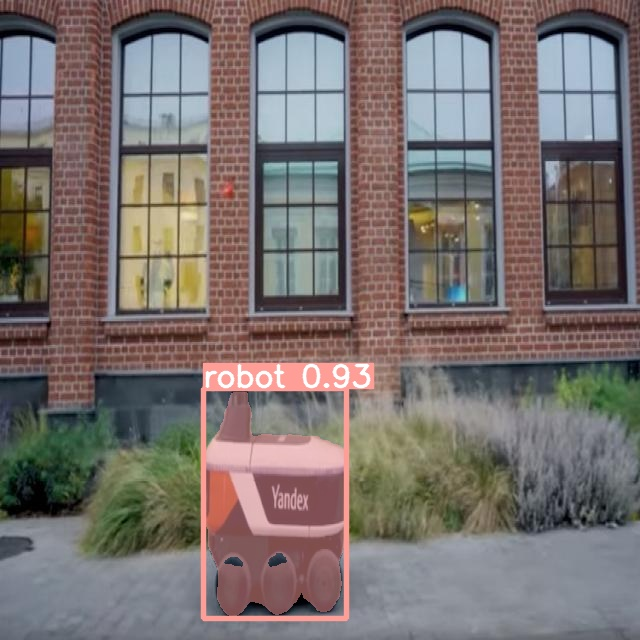

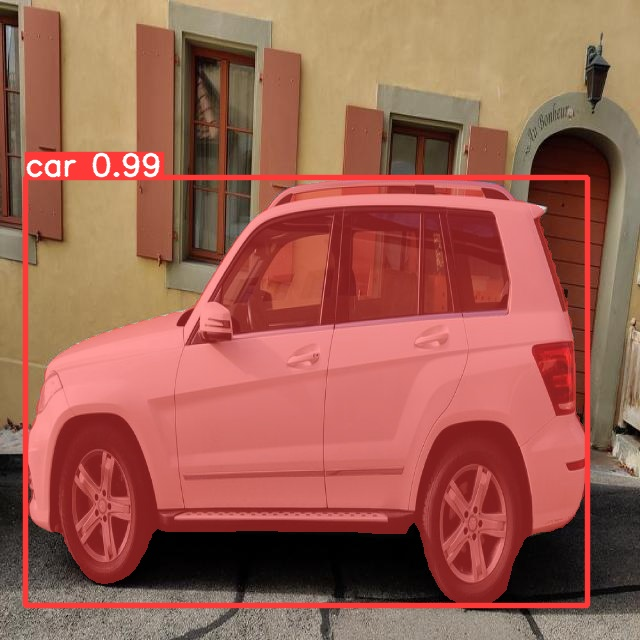

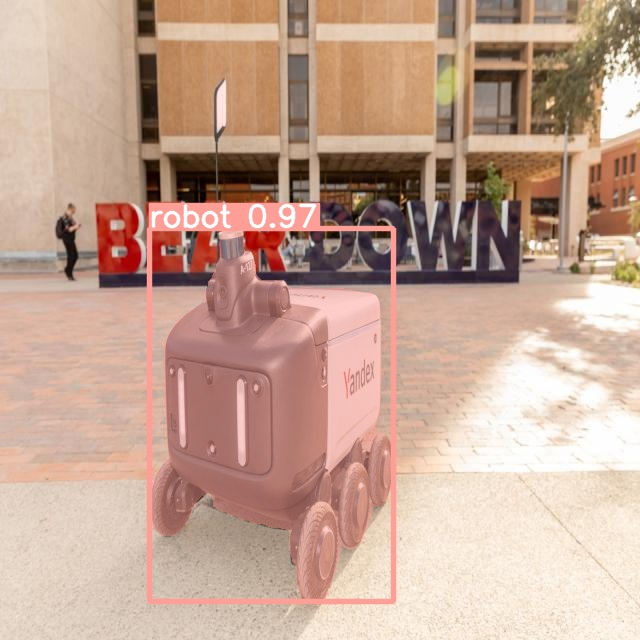

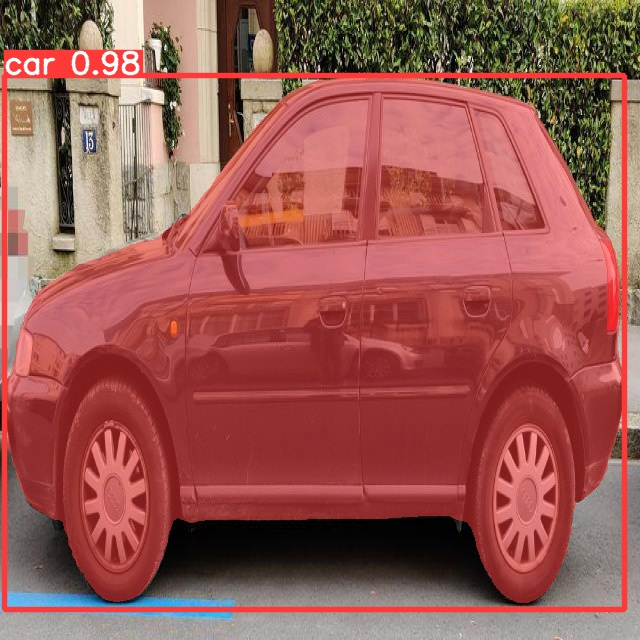

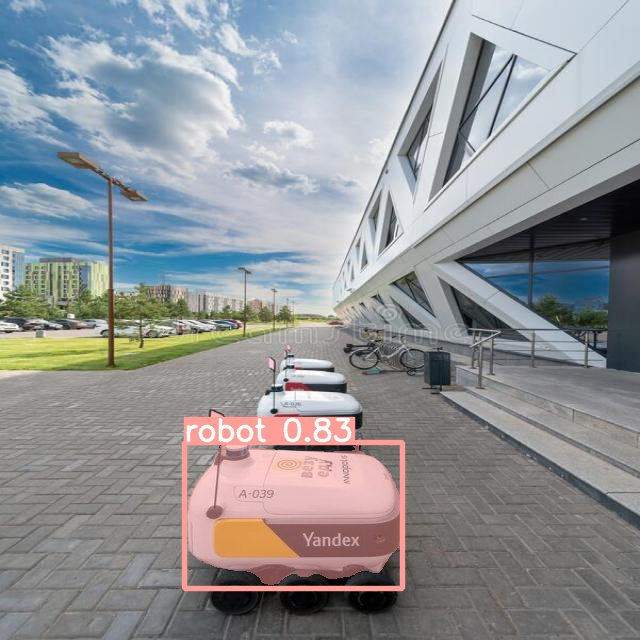

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:]:
      display(Image(filename=image_path, width=600))
      print("\n")